In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.vector_ar.var_model import VAR
import matplotlib.pyplot as plt
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
file_path = 'CARGO.csv'
cargo_data = pd.read_csv(file_path)

In [2]:
# Convert 'Year' column to datetime
cargo_data['Year'] = pd.to_datetime(cargo_data['Year'], format='%d/%m/%Y')
cargo_data.set_index('Year', inplace=True)

# Extract the Total domestic network series for ARIMA
total_domestic_network = cargo_data['Total domestic network']

# Fit the ARIMA model
arima_model = ARIMA(total_domestic_network, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast the next 12 periods (months in this case) using ARIMA
forecast_arima = arima_result.forecast(steps=12)
forecast_arima_index = pd.date_range(start=total_domestic_network.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

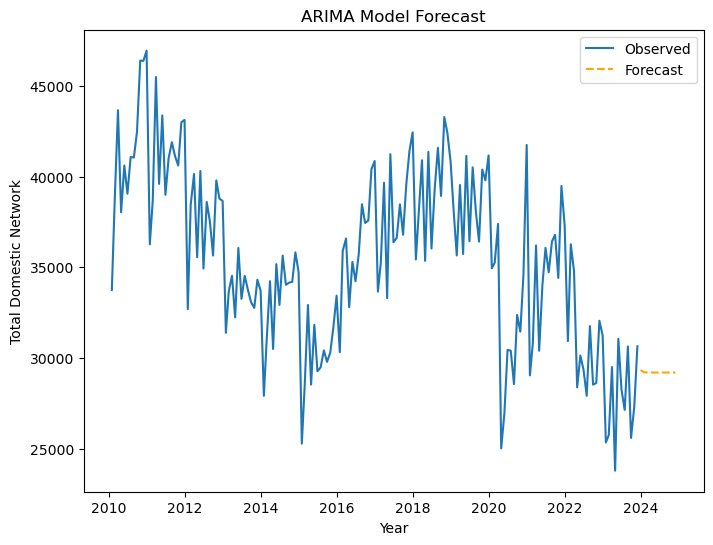

In [3]:
# Plot the ARIMA forecast
plt.figure(figsize=(8, 6))
plt.plot(total_domestic_network, label='Observed')
plt.plot(forecast_arima_index, forecast_arima, label='Forecast', linestyle='--', color='orange')
plt.title('ARIMA Model Forecast')
plt.xlabel('Year')
plt.ylabel('Total Domestic Network')
plt.legend()
plt.show()

In [4]:
# Print ARIMA forecast
print("ARIMA Model Forecast:")
print(forecast_arima)


ARIMA Model Forecast:
167    29339.356111
168    29215.207037
169    29203.429201
170    29202.311856
171    29202.205855
172    29202.195799
173    29202.194845
174    29202.194754
175    29202.194745
176    29202.194745
177    29202.194745
178    29202.194745
Name: predicted_mean, dtype: float64


In [5]:

# Select columns for the VAR model
var_data = cargo_data[['Adelaide', 'Brisbane', 'Melbourne', 'Perth', 'Sydney', 'Total domestic network']]

# Fit the VAR model
var_model = VAR(var_data)
var_result = var_model.fit(maxlags=15, ic='aic')

# Forecast the next 12 periods using VAR
forecast_var = var_result.forecast(var_data.values[-var_result.k_ar:], steps=12)
forecast_var_df = pd.DataFrame(forecast_var, index=pd.date_range(start=var_data.index[-1] + pd.DateOffset(months=1), periods=12, freq='M'), columns=var_data.columns)


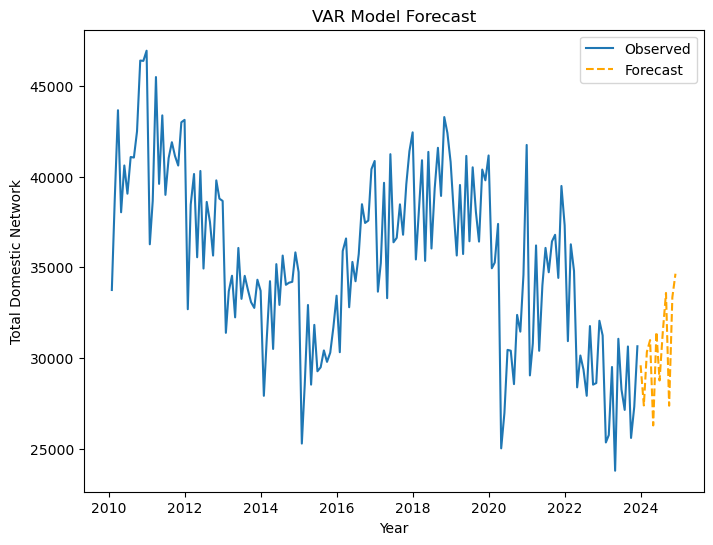

In [6]:
# Plot the VAR forecast
plt.figure(figsize=(8, 6))
plt.plot(var_data['Total domestic network'], label='Observed')
plt.plot(forecast_var_df['Total domestic network'], label='Forecast', linestyle='--', color='orange')
plt.title('VAR Model Forecast')
plt.xlabel('Year')
plt.ylabel('Total Domestic Network')
plt.legend()
plt.show()

In [7]:
# Print VAR forecast for Total Domestic Network
print("VAR Model Forecast for Total Domestic Network:")
print(forecast_var_df[['Total domestic network']])

VAR Model Forecast for Total Domestic Network:
            Total domestic network
2023-12-31            29600.376723
2024-01-31            27385.656421
2024-02-29            30334.055165
2024-03-31            30987.724657
2024-04-30            26284.268137
2024-05-31            31437.401466
2024-06-30            28762.184185
2024-07-31            31422.147666
2024-08-31            33588.222372
2024-09-30            27371.786088
2024-10-31            33350.655481
2024-11-30            34647.463297
